In [4]:
import pandas as pd
import datetime
import numpy as np
from time import sleep

import matplotlib.pyplot as plt
import seaborn as sns

from tickers import metals

In [5]:
desktop = '/Users/jagpaul/Desktop/Results/' #set to folder on your desktop

In [6]:
import yfinance as yf

In [7]:
def select_stock(stock):
    ticker = yf.Ticker(stock)
    df = ticker.history(period="100d").reset_index()
    df['ticker'] = stock
    
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    df = df.resample('D').ffill().reset_index() #fills in the weekends and holidays
    
    df = df.tail(100) #Since countries have different holidays, the ffill wont be the same for each ticker. You have to take the last 'n' entries for each ticker to align them.
    return df
    
def rank_dates(df):
    df['_rank'] = df['Date'].rank()
    return df
    
def time_series_features(df):
    df = df[['ticker', '_rank', 'Close']]
    df = pd.pivot_table(df, index='ticker', columns='_rank', values='Close').reset_index()
    return df

In [8]:
stocks_time_series_ls = []

for stock in metals:
    df = select_stock(stock)
    df = rank_dates(df)
    df = time_series_features(df)
    stocks_time_series_ls.append(df)

In [9]:
stocks_time_series_df = pd.concat(stocks_time_series_ls, ignore_index=True)

In [10]:
stocks_time_series_df

_rank,ticker,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,91.0,92.0,93.0,94.0,95.0,96.0,97.0,98.0,99.0,100.0
0,AG,12.569444,12.285547,12.165590,12.835348,12.835348,12.835348,12.655413,12.905322,12.815354,...,12.600000,12.390000,12.510000,12.510000,11.910000,11.910000,11.910000,12.270000,11.920000,11.170000
1,PGM.V,1.120000,1.130000,1.060000,1.100000,1.100000,1.100000,1.070000,1.110000,1.080000,...,0.810000,0.800000,0.810000,0.830000,0.780000,0.780000,0.780000,0.760000,0.750000,0.700000
2,K,63.808441,62.816807,62.070625,62.129532,62.129532,62.129532,62.011715,62.566628,62.715267,...,61.823441,62.804451,62.626083,62.626083,63.062088,63.062088,63.062088,63.289997,61.180000,61.029999
3,PAAS.TO,31.893093,31.374994,31.285322,32.441086,32.441086,32.441086,32.092361,32.640354,32.411194,...,33.009998,33.189999,33.419998,33.560001,32.660000,32.660000,32.660000,32.619999,32.630001,30.809999
4,PAAS,25.337225,24.908792,24.639778,25.735765,25.735765,25.735765,25.476713,25.845364,25.705873,...,25.959999,26.180000,26.410000,26.410000,25.790001,25.790001,25.790001,25.549999,25.540001,24.059999
5,MAG,18.650000,18.440001,18.370001,19.400000,19.400000,19.400000,18.910000,19.190001,18.980000,...,18.070000,17.299999,17.250000,17.250000,16.309999,16.309999,16.309999,16.350000,16.610001,15.540000
6,SILV,7.620000,7.560000,7.520000,7.920000,7.920000,7.920000,7.810000,7.990000,7.950000,...,8.840000,8.670000,8.720000,8.720000,8.420000,8.420000,8.420000,8.540000,8.420000,7.790000
7,HL,5.884381,5.764496,5.664591,6.064210,6.064210,6.064210,5.994277,6.144134,6.114162,...,5.910000,5.830000,5.840000,5.840000,5.580000,5.580000,5.580000,5.600000,5.540000,5.230000
8,ALS.TO,16.206095,16.176361,15.888913,16.206095,16.206095,16.206095,16.454962,16.216051,16.086641,...,16.355415,17.171692,16.036869,15.827821,15.350000,15.350000,15.350000,15.650000,16.129999,15.700000
9,BYN.V,0.270000,0.265000,0.260000,0.265000,0.265000,0.265000,0.300000,0.295000,0.290000,...,0.330000,0.335000,0.325000,0.330000,0.325000,0.325000,0.325000,0.310000,0.320000,0.315000


In [11]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [12]:
features = stocks_time_series_df.iloc[:, 1:]
features

_rank,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,91.0,92.0,93.0,94.0,95.0,96.0,97.0,98.0,99.0,100.0
0,12.569444,12.285547,12.165590,12.835348,12.835348,12.835348,12.655413,12.905322,12.815354,12.765373,...,12.600000,12.390000,12.510000,12.510000,11.910000,11.910000,11.910000,12.270000,11.920000,11.170000
1,1.120000,1.130000,1.060000,1.100000,1.100000,1.100000,1.070000,1.110000,1.080000,1.080000,...,0.810000,0.800000,0.810000,0.830000,0.780000,0.780000,0.780000,0.760000,0.750000,0.700000
2,63.808441,62.816807,62.070625,62.129532,62.129532,62.129532,62.011715,62.566628,62.715267,62.883720,...,61.823441,62.804451,62.626083,62.626083,63.062088,63.062088,63.062088,63.289997,61.180000,61.029999
3,31.893093,31.374994,31.285322,32.441086,32.441086,32.441086,32.092361,32.640354,32.411194,32.192001,...,33.009998,33.189999,33.419998,33.560001,32.660000,32.660000,32.660000,32.619999,32.630001,30.809999
4,25.337225,24.908792,24.639778,25.735765,25.735765,25.735765,25.476713,25.845364,25.705873,25.656057,...,25.959999,26.180000,26.410000,26.410000,25.790001,25.790001,25.790001,25.549999,25.540001,24.059999
5,18.650000,18.440001,18.370001,19.400000,19.400000,19.400000,18.910000,19.190001,18.980000,18.900000,...,18.070000,17.299999,17.250000,17.250000,16.309999,16.309999,16.309999,16.350000,16.610001,15.540000
6,7.620000,7.560000,7.520000,7.920000,7.920000,7.920000,7.810000,7.990000,7.950000,7.870000,...,8.840000,8.670000,8.720000,8.720000,8.420000,8.420000,8.420000,8.540000,8.420000,7.790000
7,5.884381,5.764496,5.664591,6.064210,6.064210,6.064210,5.994277,6.144134,6.114162,6.134143,...,5.910000,5.830000,5.840000,5.840000,5.580000,5.580000,5.580000,5.600000,5.540000,5.230000
8,16.206095,16.176361,15.888913,16.206095,16.206095,16.206095,16.454962,16.216051,16.086641,15.927367,...,16.355415,17.171692,16.036869,15.827821,15.350000,15.350000,15.350000,15.650000,16.129999,15.700000
9,0.270000,0.265000,0.260000,0.265000,0.265000,0.265000,0.300000,0.295000,0.290000,0.300000,...,0.330000,0.335000,0.325000,0.330000,0.325000,0.325000,0.325000,0.310000,0.320000,0.315000


In [13]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [14]:
kmeans = KMeans(
init="random",
n_clusters=3,
n_init=10,
max_iter=300,
random_state=42
)

In [15]:
kmeans.fit(scaled_features)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=3,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=42,
       tol=0.0001, verbose=0)

In [16]:
identified_clusters = kmeans.fit_predict(scaled_features)
identified_clusters

array([1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 2])

In [17]:
data_with_clusters = stocks_time_series_df.copy()
data_with_clusters['Clusters'] = identified_clusters 
#plt.scatter(data_with_clusters['Longitude'],data_with_clusters['Latitude'],c=data_with_clusters['Clusters'],cmap='rainbow')

In [18]:
data_with_clusters.sort_values(by='Clusters')

_rank,ticker,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,92.0,93.0,94.0,95.0,96.0,97.0,98.0,99.0,100.0,Clusters
2,K,63.808441,62.816807,62.070625,62.129532,62.129532,62.129532,62.011715,62.566628,62.715267,...,62.804451,62.626083,62.626083,63.062088,63.062088,63.062088,63.289997,61.180000,61.029999,0
3,PAAS.TO,31.893093,31.374994,31.285322,32.441086,32.441086,32.441086,32.092361,32.640354,32.411194,...,33.189999,33.419998,33.560001,32.660000,32.660000,32.660000,32.619999,32.630001,30.809999,0
4,PAAS,25.337225,24.908792,24.639778,25.735765,25.735765,25.735765,25.476713,25.845364,25.705873,...,26.180000,26.410000,26.410000,25.790001,25.790001,25.790001,25.549999,25.540001,24.059999,0
22,GDXJ,42.119999,41.430000,41.150002,43.080002,43.080002,43.080002,42.450001,43.110001,42.830002,...,43.980000,44.110001,44.110001,42.919998,42.919998,42.919998,43.090000,42.689999,41.080002,0
21,GDX,32.110001,31.680000,31.480000,32.610001,32.610001,32.610001,32.169998,32.599998,32.380001,...,32.500000,32.419998,32.419998,32.119999,32.119999,32.119999,32.130001,31.799999,30.830000,0
20,SII,33.803040,34.190891,33.673752,33.633972,33.633972,33.633972,33.315731,33.395294,33.952209,...,45.689999,45.869999,45.869999,45.110001,45.110001,45.110001,44.570000,43.549999,44.009998,0
25,FCX,35.136276,35.036488,34.467682,36.493431,36.493431,36.493431,36.563282,36.313805,35.814854,...,38.680000,38.650002,38.650002,37.240002,37.240002,37.240002,37.980000,37.080002,36.230000,0
0,AG,12.569444,12.285547,12.165590,12.835348,12.835348,12.835348,12.655413,12.905322,12.815354,...,12.390000,12.510000,12.510000,11.910000,11.910000,11.910000,12.270000,11.920000,11.170000,1
24,WRN.TO,2.170000,2.110000,2.110000,2.120000,2.120000,2.120000,2.160000,2.130000,2.110000,...,1.840000,1.810000,1.820000,1.770000,1.770000,1.770000,1.810000,1.770000,1.730000,1
23,SSRM.TO,20.400000,20.030001,20.120001,20.950001,20.950001,20.950001,20.549999,21.080000,20.799999,...,23.530001,23.459999,23.299999,22.860001,22.860001,22.860001,23.129999,23.190001,22.670000,1


In [19]:
# The lowest SSE value
kmeans.inertia_


146.76712780964726

In [20]:
# Final locations of the centroid
kmeans.cluster_centers_

array([[ 0.45293103,  0.4578254 ,  0.45119835,  0.45182026,  0.45182026,
         0.45182026,  0.45553202,  0.45179987,  0.4540376 ,  0.46184162,
         0.46185641,  0.46185641,  0.46185641,  0.46185641,  0.45758332,
         0.45397501,  0.46563742,  0.46839667,  0.46839667,  0.46839667,
         0.48398799,  0.47760442,  0.4759985 ,  0.47287518,  0.4777904 ,
         0.4777904 ,  0.4777904 ,  0.46461099,  0.45460133,  0.47435557,
         0.48519672,  0.49059213,  0.49059213,  0.49059213,  0.50320082,
         0.49704331,  0.49938981,  0.49517799,  0.50767057,  0.50767057,
         0.50767057,  0.51160706,  0.50779345,  0.50039144,  0.49821551,
         0.49132059,  0.49132059,  0.49132059,  0.49308771,  0.49873091,
         0.5027703 ,  0.50993841,  0.50394093,  0.50394093,  0.50394093,
         0.49791661,  0.50184177,  0.51372575,  0.49811986,  0.49937714,
         0.49937714,  0.49937714,  0.50202772,  0.5005546 ,  0.49958514,
         0.49059172,  0.49191928,  0.49191928,  0.4

In [21]:
# The number of iterations required to converge
kmeans.n_iter_

7

In [22]:
kmeans.labels_

array([1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 2])

In [23]:
kmeans_kwargs = {
"init": "random",
"n_init": 10,
"max_iter": 300,
"random_state": 42,
}


# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

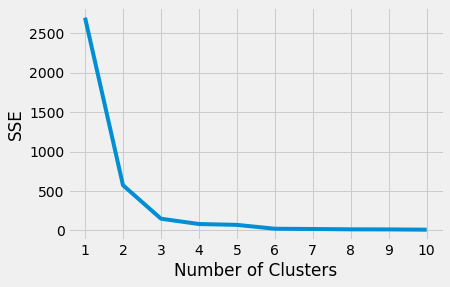

In [24]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [25]:
kl = KneeLocator(
range(1, 11), sse, curve="convex", direction="decreasing"
)

kl.elbow


3

In [26]:
In [17]: # A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)

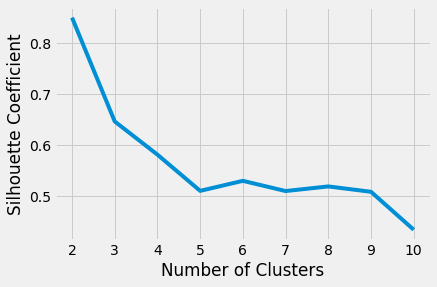

In [27]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [28]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
from sklearn.metrics import adjusted_rand_score

In [29]:
features, true_labels = make_moons(
n_samples=250, noise=0.05, random_state=42
)
scaled_features = scaler.fit_transform(features)

In [30]:
# Instantiate k-means and dbscan algorithms
kmeans = KMeans(n_clusters=2)
dbscan = DBSCAN(eps=0.3)

# Fit the algorithms to the features
kmeans.fit(scaled_features)
dbscan.fit(scaled_features)

# Compute the silhouette scores for each algorithm
kmeans_silhouette = silhouette_score(
scaled_features, kmeans.labels_
).round(2)


dbscan_silhouette = silhouette_score(
scaled_features, dbscan.labels_
).round (2)

In [31]:
kmeans_silhouette

0.5

In [32]:
dbscan_silhouette

0.38

In [33]:
ari_kmeans = adjusted_rand_score(true_labels, kmeans.labels_)
ari_dbscan = adjusted_rand_score(true_labels, dbscan.labels_)

In [34]:
round(ari_kmeans, 2)

0.47

In [35]:
round(ari_dbscan, 2)

1.0